<a href="https://colab.research.google.com/github/jodejetalo99/Datos-Masivos/blob/master/An%C3%A1lisis_exploratorio_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_prior = pd.read_csv("drive/My Drive/order_products__prior.csv")
df_products = pd.read_csv("drive/My Drive/products.csv")
df_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
df_prior.shape

(32434489, 4)

In [4]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



### ¿Cuántos productos contiene cada pedido?



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Número de productos en una orden')

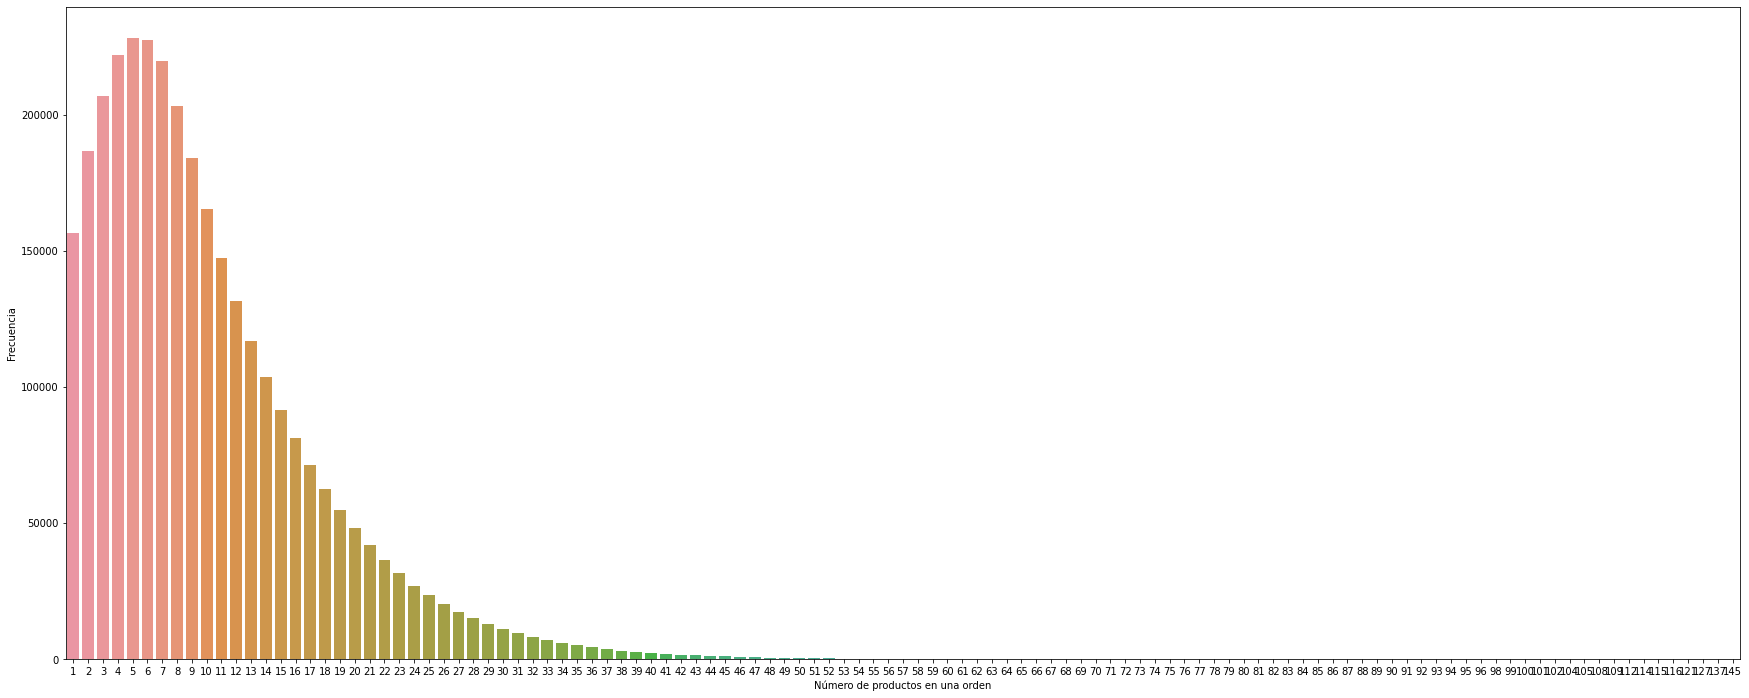

In [11]:
canasta_cant = df.groupby("order_id")["add_to_cart_order"].aggregate(max).value_counts()

fig, ax = plt.subplots(figsize=(30, 12))
sns.barplot(canasta_cant.index, canasta_cant.values)
plt.ylabel('Frecuencia')
plt.xlabel('Número de productos en una orden')

### Productos más relevantes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Número de órdenes que contienen ese producto')

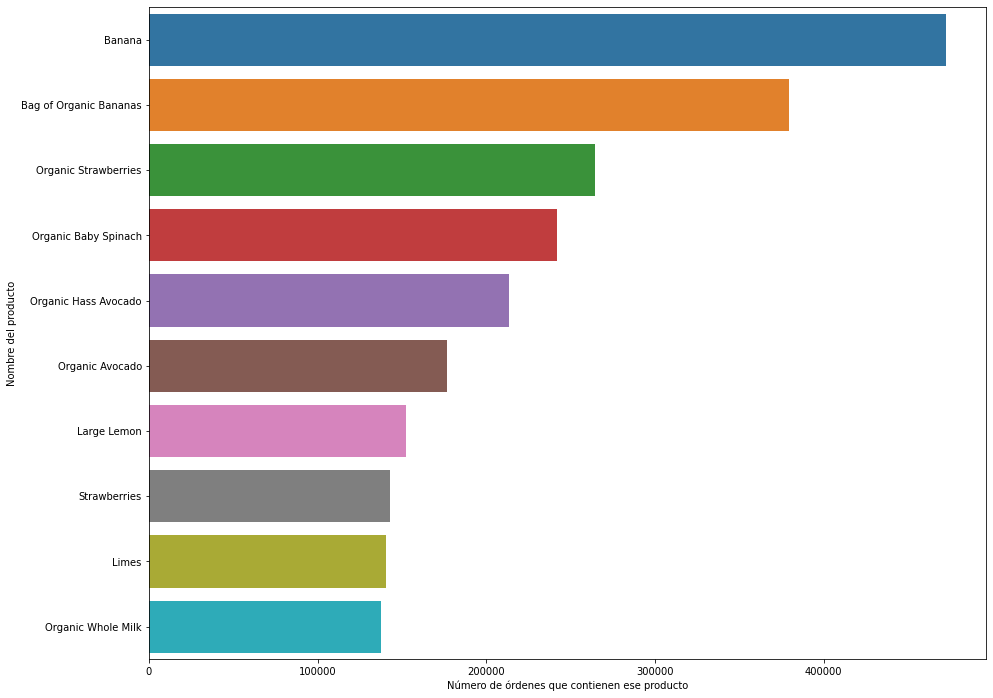

In [6]:
df_prior = pd.merge(df_prior, df_products, on = 'product_id', how = 'left')
products_relev = df_prior['product_name'].value_counts().reset_index().head(10)
products_relev.columns = ['product_name', 'Frecuencia']
fig, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='horizontal')
sns.barplot(products_relev.Frecuencia, products_relev.product_name)
plt.ylabel('Nombre del producto')
plt.xlabel('Número de órdenes que contienen ese producto')